In [2]:
#Project --> 2 Toxic Tweets Dataset : NLP Problem

#Import necessary libraries

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
# Load the dataset into a Pandas DataFrame

df = pd.read_csv("FinalBalancedDataset.csv")

In [6]:
#Data pre-processing

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    words = word_tokenize(text.lower())
    words = [stemmer.stem(word) for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

# Apply text preprocessing to the 'text' column
df['clean_text'] = df['tweet'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sujay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sujay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
#Conversion of text

# Bag of Words
count_vectorizer = CountVectorizer()
bow_features = count_vectorizer.fit_transform(df['clean_text'])

# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(df['clean_text'])


In [13]:
#Train and test data split

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_features, df['Toxicity'], test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_features, df['Toxicity'], test_size=0.2, random_state=42)


In [15]:
#Prediction methods

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, precision, recall, f1, confusion, roc_auc



In [26]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "K-NN": KNeighborsClassifier(),
    "SVM": SVC()
}

results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    results[name + '_bow'] = evaluate_model(model, X_train_bow, X_test_bow, y_train_bow, y_test_bow)
    results[name + '_tfidf'] = evaluate_model(model, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf)


Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating Naive Bayes...
Evaluating K-NN...
Evaluating SVM...


In [28]:
# Print results
for name, (accuracy, precision, recall, f1, confusion, roc_auc) in results.items():
    print(f"{name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1 Score: {f1}")
    print(f"  Confusion Matrix:\n{confusion}")
    print(f"  ROC-AUC: {roc_auc}")


Decision Tree_bow:
  Accuracy: 0.9350603577407701
  Precision: 0.9346913061738765
  Recall: 0.9126512200123027
  F1 Score: 0.9235397862848843
  Confusion Matrix:
[[6161  311]
 [ 426 4451]]
  ROC-AUC: 0.9322990339863739
Decision Tree_tfidf:
  Accuracy: 0.9337386553881399
  Precision: 0.9317563324262089
  Recall: 0.9126512200123027
  F1 Score: 0.922104827014709
  Confusion Matrix:
[[6146  326]
 [ 426 4451]]
  ROC-AUC: 0.9311401959146803
Random Forest_bow:
  Accuracy: 0.9364701735835756
  Precision: 0.938026981450253
  Recall: 0.9124461759278245
  F1 Score: 0.9250597650971832
  Confusion Matrix:
[[6178  294]
 [ 427 4450]]
  ROC-AUC: 0.9335098617587206
Random Forest_tfidf:
  Accuracy: 0.9369988545246277
  Precision: 0.9368178001679262
  Recall: 0.9151117490260406
  F1 Score: 0.9258375687169381
  Confusion Matrix:
[[6171  301]
 [ 414 4463]]
  ROC-AUC: 0.9343018572077052
Naive Bayes_bow:
  Accuracy: 0.91593973037272
  Precision: 0.8851364618103279
  Recall: 0.924338732827558
  F1 Score: 0.90

In [7]:
#Project --> 3 Regression Problem 1

#Import required Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
# Load data
train_df = pd.read_csv("p1_train.csv", header=None)
test_df = pd.read_csv("p1_test.csv", header=None)

train_df.columns = [''] * len(train_df.columns)
test_df.columns = [''] * len(test_df.columns)

In [9]:
#Preprocess the Data
X_train = train_df.iloc[:, :-1] 
y_train = train_df.iloc[:, -1]  

X_test = test_df.iloc[:, :-1]    
y_test = test_df.iloc[:, -1]    


In [10]:
#Train the Models

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# SVR
svr = SVR()
svr.fit(X_train, y_train)

common_columns = X_train.columns.intersection(X_test.columns)
X_test_filtered = X_test[common_columns]
X_test_filtered = pd.DataFrame(X_test_filtered)

In [11]:
#Evaluate the Models

# Predictions
y_pred_linear = linear_reg.predict(X_test_filtered)
y_pred_svr = svr.predict(X_test_filtered)

# Calculate Mean Squared Error and Mean Absolute Error

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

In [12]:
# Print the evaluation metrics

print("Linear Regression:")
print("Mean Squared Error:", mse_linear)
print("Mean Absolute Error:", mae_linear)
print("\nSVR:")
print("Mean Squared Error:", mse_svr)
print("Mean Absolute Error:", mae_svr)


Linear Regression:
Mean Squared Error: 5.046436003951251
Mean Absolute Error: 1.7990800530982611

SVR:
Mean Squared Error: 5.420148517932794
Mean Absolute Error: 1.8571235007708717


Files in directory:
['X_kannada_MNIST_test.npz', 'X_kannada_MNIST_train.npz', 'y_kannada_MNIST_test.npz', 'y_kannada_MNIST_train.npz']
X_train shape: (10000, 28, 28), y_train shape: (10000,)
X_test shape: (60000, 28, 28), y_test shape: (60000,)
Shape of X_train_flat: (10000, 784)
Shape of X_test_flat: (60000, 784)


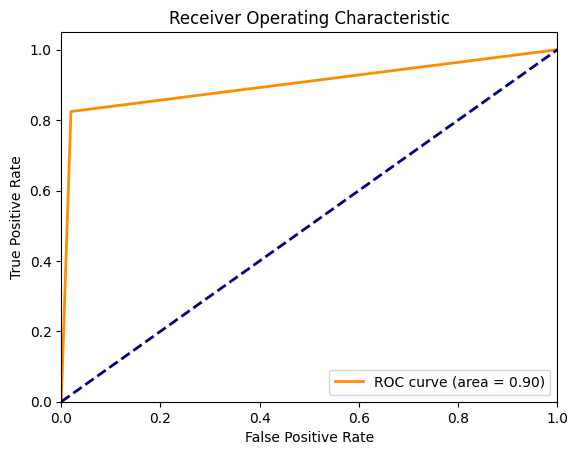

Model: Decision Trees
Precision: 0.8286, Recall: 0.8245, F1-Score: 0.8252
Confusion Matrix:
[[5197  353   77   29    5   23   10   35  155  116]
 [1117 4572   20   37   18   20   22   54   61   79]
 [ 129   34 5385   65   58  144   41   65   52   27]
 [ 150   65   37 5086  154  118  126  242   12   10]
 [  64   40   17  196 4959  457   53   92   44   78]
 [  16   88  218  238  280 4768  122  103  108   59]
 [  38   22   35  164   20   45 4674  949    4   49]
 [  50   17   49  443  140   52  477 4745    6   21]
 [ 170   76   25   33   72  220   40   38 5181  145]
 [ 239  173   24   45  128   82   70  172  164 4903]]
ROC-AUC Score: 0.9025



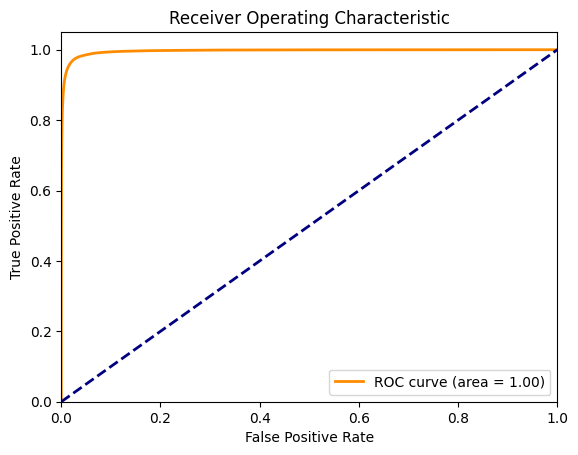

Model: Random Forest
Precision: 0.9306, Recall: 0.9293, F1-Score: 0.9295
Confusion Matrix:
[[5735  185    0   15    0    2    5    4   37   17]
 [ 316 5607    0   11    1    1    2    1   19   42]
 [ 112   19 5790   38    3   28    1    2    6    1]
 [  98   23   11 5711   33   35   32   51    4    2]
 [   5    5    2   64 5710  134   16   30   15   19]
 [   2   21   82  137   68 5626   34    3   24    3]
 [  12    7    4   56   13    3 5209  688    0    8]
 [  33   22    9  282   47   14  391 5192    3    7]
 [ 100   30    7   63   15   34    7    1 5712   31]
 [ 123   23    3   31  123   29   36  113   54 5465]]
ROC-AUC Score: 0.9963



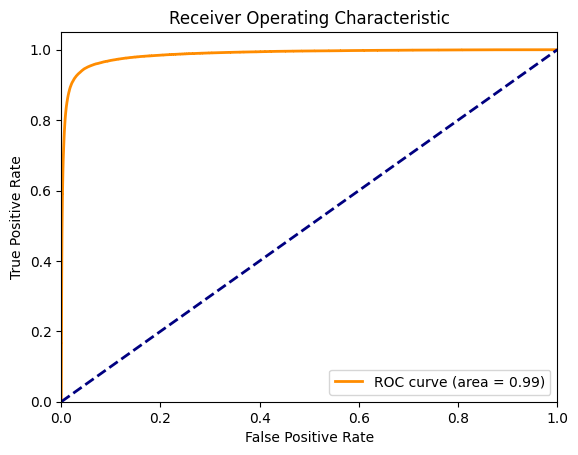

Model: Naive Bayes
Precision: 0.8751, Recall: 0.8709, F1-Score: 0.8720
Confusion Matrix:
[[5334  358    0   19    2    1    3   26  227   30]
 [ 520 5255    0   27    4    1    1    8   76  108]
 [ 350   36 5475    9    0   83    5   32    8    2]
 [ 185   28    6 5444   47   78   93  112    5    2]
 [  12    2    2   66 5590  172    3   70   47   36]
 [   2   26  108  157   88 5513   48    6   52    0]
 [  49   10    3   56   11    4 4602 1262    1    2]
 [ 149   15    0  348   42    8 1118 4310    7    3]
 [ 258   41    1   54   33   15   12    5 5500   81]
 [ 333   13    0   10  109    5   13  206   82 5229]]
ROC-AUC Score: 0.9860



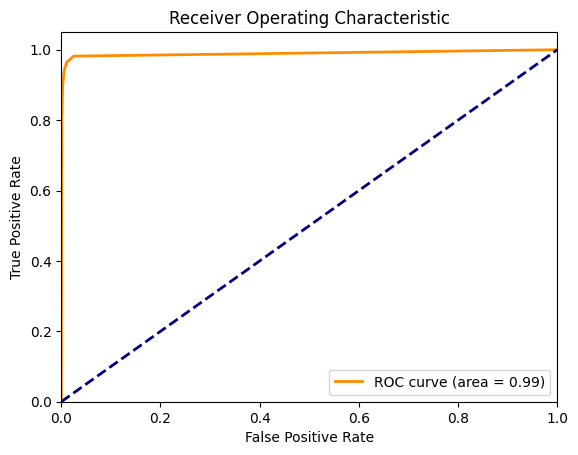

Model: K-NN Classifier
Precision: 0.9435, Recall: 0.9424, F1-Score: 0.9426
Confusion Matrix:
[[5745  179    2   15    1    4    2    9   27   16]
 [ 404 5552    0    6    1    1    0    1    3   32]
 [  63    9 5880   34    1    7    0    2    1    3]
 [  99   10    6 5775   35   26    9   34    4    2]
 [   2   12    0   42 5734  143   12   34    4   17]
 [   2    4   15   92   56 5768   51    4    6    2]
 [   7    3    2   28   19    1 5481  450    0    9]
 [   8   11    0  278   34   13  335 5310    2    9]
 [ 111   23    1   37   31   72    5    2 5693   25]
 [  62    3    6   24  113   19   53  109    7 5604]]
ROC-AUC Score: 0.9892



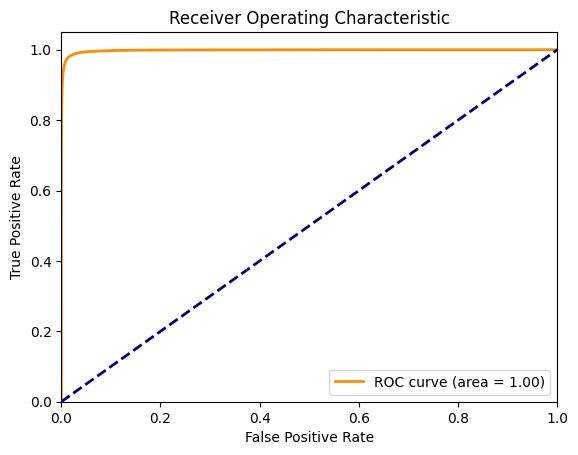

Model: SVM
Precision: 0.9525, Recall: 0.9519, F1-Score: 0.9520
Confusion Matrix:
[[5799  125    0   11    0    3    1    7   41   13]
 [ 243 5714    0   10    1    0    1    1    5   25]
 [  72    6 5877   36    0    3    0    4    0    2]
 [  64    8    6 5800   28   30   12   48    3    1]
 [   3    1    1   40 5734  143    7   37    6   28]
 [   3   10   32   75   58 5759   44    2   15    2]
 [   1    3    4   37    7    2 5598  341    0    7]
 [  10   11    2  230   11    6  295 5418    1   16]
 [  71   11    5   44   24   40    1    0 5783   21]
 [  39    4    7   17  117   23   59   96    7 5631]]
ROC-AUC Score: 0.9982



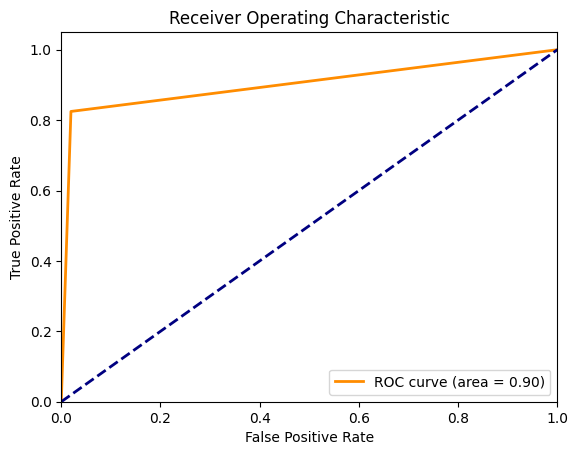

Model: Decision Trees
Precision: 0.8284, Recall: 0.8246, F1-Score: 0.8253
Confusion Matrix:
[[5163  359   81   51    8    6    6   42  208   76]
 [1106 4543   26   41   24   35   28   48   76   73]
 [ 115   82 5345  114   24  138   55   57   53   17]
 [ 175  103   58 5067  113  110  109  242   10   13]
 [  61   33   18  194 4948  488   57   84   34   83]
 [  11   71  183  186  295 4930  150   71   88   15]
 [  35   30   33  143   42   41 4662  937   13   64]
 [  55   17   15  355  144   91  460 4829   15   19]
 [ 186   93   30   31   63  193   58   41 5108  197]
 [ 172  188   27   50  171   95   93  157  163 4884]]
ROC-AUC Score: 0.9026



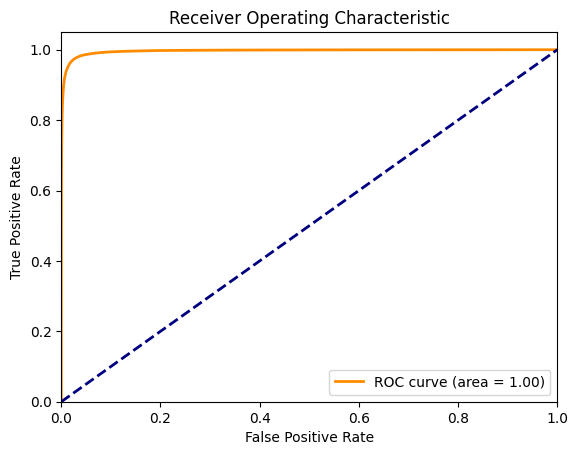

Model: Random Forest
Precision: 0.9336, Recall: 0.9325, F1-Score: 0.9326
Confusion Matrix:
[[5739  181    2   20    2    1    1    5   35   14]
 [ 256 5662    0   12    1    1    1    0   24   43]
 [ 121   19 5791   41    5   12    1    4    5    1]
 [ 102   25    9 5724   29   42   17   46    4    2]
 [   7    6    2   50 5700  158   12   33   14   18]
 [   3   34   85  119   48 5656   32    3   17    3]
 [  10    8    3   55   10    7 5209  686    0   12]
 [  31   14   11  282   36   16  359 5244    4    3]
 [ 114   26    5   68   16   19   16    0 5700   36]
 [  89   22    2   23  110   22   38  121   51 5522]]
ROC-AUC Score: 0.9963



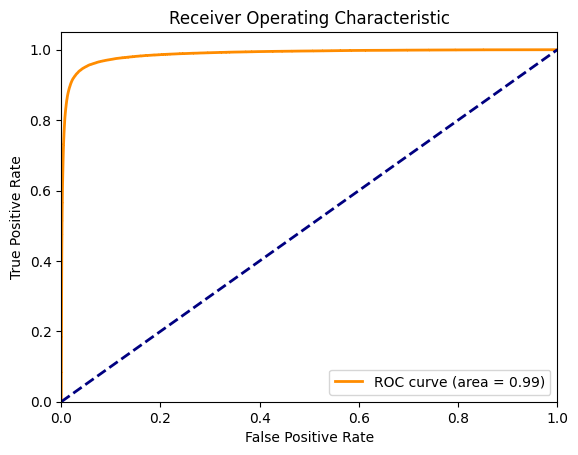

Model: Naive Bayes
Precision: 0.8807, Recall: 0.8760, F1-Score: 0.8772
Confusion Matrix:
[[5413  320    0   16    2    1    1   37  201    9]
 [ 556 5250    0   29    4    1    1    8   60   91]
 [ 385   14 5476    9    0   56   11   30   19    0]
 [ 204   26    8 5426   46   78   71  138    3    0]
 [  17    3    3   60 5596  165    2   81   49   24]
 [   4   36  101  134   87 5531   42    7   57    1]
 [  48    8    3   49    6    4 4678 1201    1    2]
 [ 177   17    0  303   33   12 1105 4342    8    3]
 [ 248   21    1   66   29   10   10    8 5531   76]
 [ 246   16    2    9   95   17   12  198   90 5315]]
ROC-AUC Score: 0.9870



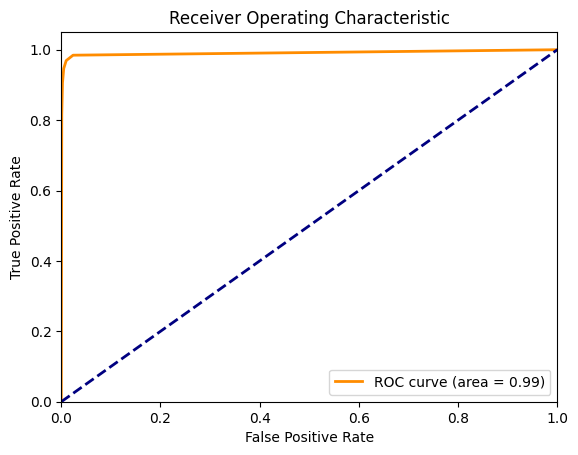

Model: K-NN Classifier
Precision: 0.9503, Recall: 0.9494, F1-Score: 0.9495
Confusion Matrix:
[[5780  165    0   16    0    2    1    6   24    6]
 [ 347 5608    0    6    1    1    0    0    4   33]
 [  71    4 5880   30    3    5    2    5    0    0]
 [  98    9    8 5791   23   29    3   37    1    1]
 [   5    4    0   27 5776  141   10   28    2    7]
 [   2    6   12   79   53 5826   18    1    1    2]
 [   3    2    1   23   17    2 5533  404    0   15]
 [   5    7    0  239   43    5  318 5370    0   13]
 [ 127   14    1   42   33   35    1    4 5722   21]
 [  27    1    2   19   99   12   50  108    7 5675]]
ROC-AUC Score: 0.9908



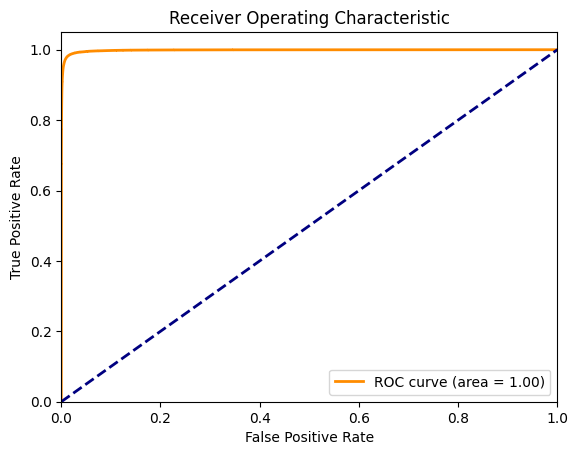

Model: SVM
Precision: 0.9585, Recall: 0.9579, F1-Score: 0.9580
Confusion Matrix:
[[5844  105    0   12    0    1    3    4   24    7]
 [ 193 5770    0    9    1    0    1    0    5   21]
 [  62    5 5899   29    0    1    0    4    0    0]
 [  52    3    4 5847   21   29    5   36    3    0]
 [   2    1    0   35 5715  188    5   36    6   12]
 [   0   15   15   68   38 5840    9    2   12    1]
 [   4    2    3   27    8    2 5574  372    0    8]
 [  13    9    0  197    8    2  264 5498    1    8]
 [  67   14    5   48   18   11    4    3 5816   14]
 [  32    6    2   14   93    8   64  105    4 5672]]
ROC-AUC Score: 0.9986



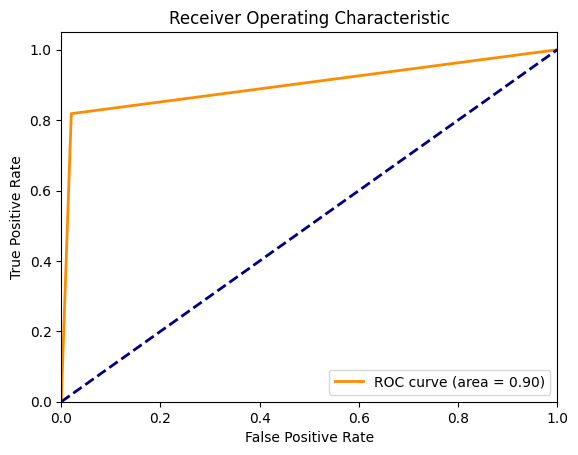

Model: Decision Trees
Precision: 0.8220, Recall: 0.8184, F1-Score: 0.8191
Confusion Matrix:
[[5153  355   82   29   12   13   14   78  197   67]
 [1138 4528   13   35   17   42   27   53   59   88]
 [ 124   90 5344  105   16  149   41   58   53   20]
 [ 165   92   57 4984  172  128  116  260   16   10]
 [  39   41    3  190 4929  474   71   90   37  126]
 [  23  101  215  216  307 4822  141   45  102   28]
 [  32   27   31  139   37   61 4638  970    9   56]
 [  53   28   34  418  161   26  511 4713   16   40]
 [ 195  116   29   16   56  204   27   40 5144  173]
 [ 203  192   27   49  141  104  108  161  167 4848]]
ROC-AUC Score: 0.8991



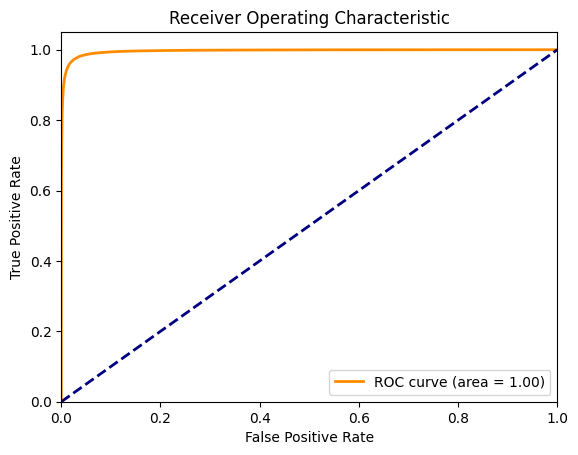

Model: Random Forest
Precision: 0.9338, Recall: 0.9328, F1-Score: 0.9329
Confusion Matrix:
[[5736  182    2   14    1    0    0   10   44   11]
 [ 216 5705    0   14    1    1    2    1   21   39]
 [ 119   16 5792   49    3   15    1    1    4    0]
 [ 100   23   10 5741   26   39   12   45    2    2]
 [   6    8    2   47 5691  162   11   38   13   22]
 [   2   32   85  115   59 5651   32    2   21    1]
 [  12    7    3   68   11    5 5218  667    0    9]
 [  40   14   11  293   24   11  399 5200    5    3]
 [ 116   19    6   42   20   17   19    1 5727   33]
 [  93   28    3   32  104   29   39  122   45 5505]]
ROC-AUC Score: 0.9964



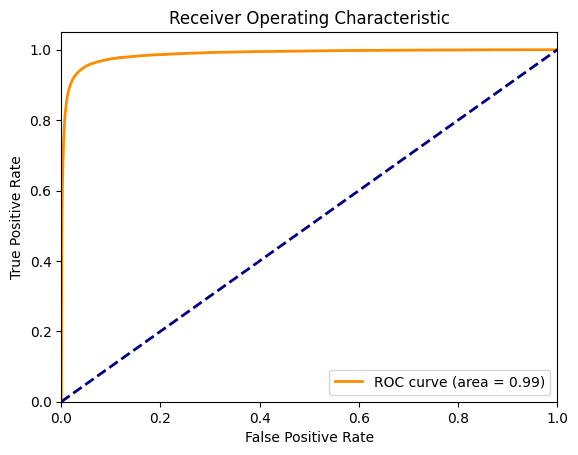

Model: Naive Bayes
Precision: 0.8806, Recall: 0.8758, F1-Score: 0.8769
Confusion Matrix:
[[5414  331    0   13    1    1    1   27  204    8]
 [ 522 5302    0   29    4    0    1   11   58   73]
 [ 400   22 5469   17    1   35    9   19   27    1]
 [ 219   23    5 5424   45   60   49  168    7    0]
 [  24    3    1   44 5548  186    2  118   51   23]
 [   3   47   81  106   97 5536   35   12   81    2]
 [  55    6    3   58   10    3 4712 1146    2    5]
 [ 217   15    0  433   34   14 1004 4265   14    4]
 [ 241   24    1   41   33    9   12    7 5568   64]
 [ 251   24    0   10   95   15   12  195   89 5309]]
ROC-AUC Score: 0.9874



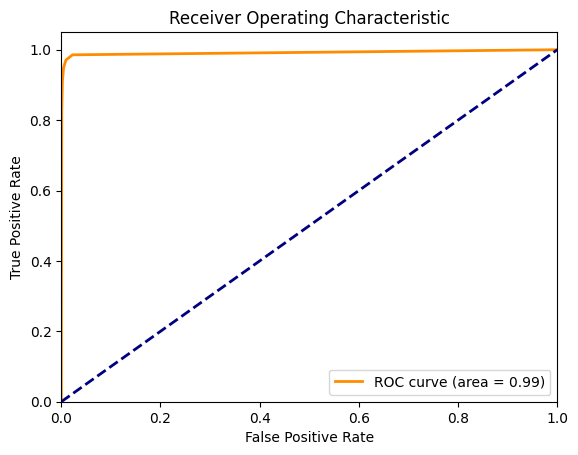

Model: K-NN Classifier
Precision: 0.9527, Recall: 0.9519, F1-Score: 0.9521
Confusion Matrix:
[[5775  184    0   11    0    1    0    5   21    3]
 [ 289 5676    0    5    2    0    0    1    3   24]
 [  54    6 5890   36    6    4    2    2    0    0]
 [  91    9   10 5798   24   28    0   36    3    1]
 [   4    6    0   28 5829   89    8   28    2    6]
 [   2    8   10   84   50 5822   18    2    2    2]
 [   2    2    1   21   16    0 5522  418    0   18]
 [   5   11    2  252   25    3  314 5376    1   11]
 [ 149   13    1   21   20   31    1    3 5743   18]
 [  33    0    1    9   83   11   56  120    4 5683]]
ROC-AUC Score: 0.9914



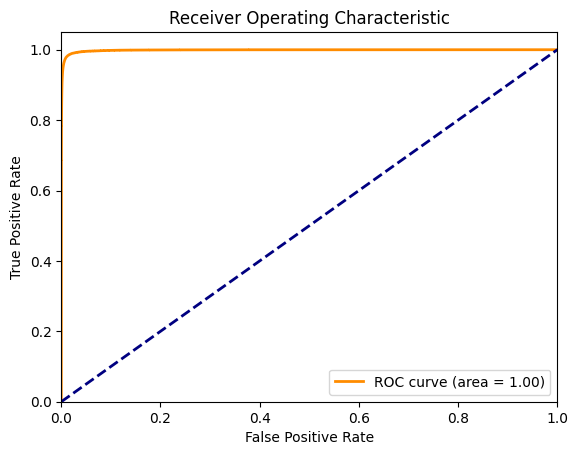

Model: SVM
Precision: 0.9600, Recall: 0.9595, F1-Score: 0.9596
Confusion Matrix:
[[5851  101    0   10    0    0    1    5   24    8]
 [ 152 5812    0    9    1    0    0    0    6   20]
 [  50    4 5907   34    0    1    1    3    0    0]
 [  54    2    5 5842   16   38    4   36    3    0]
 [   3    0    0   44 5730  167    4   35    4   13]
 [   1   13   13   75   33 5851    3    2    7    2]
 [   0    1    1   25    6    1 5590  368    0    8]
 [  12    9    1  205    5    4  283 5473    0    8]
 [  74    9    2   24   16   10    4    2 5840   19]
 [  23    2    1   17   97   12   71   99    2 5676]]
ROC-AUC Score: 0.9986



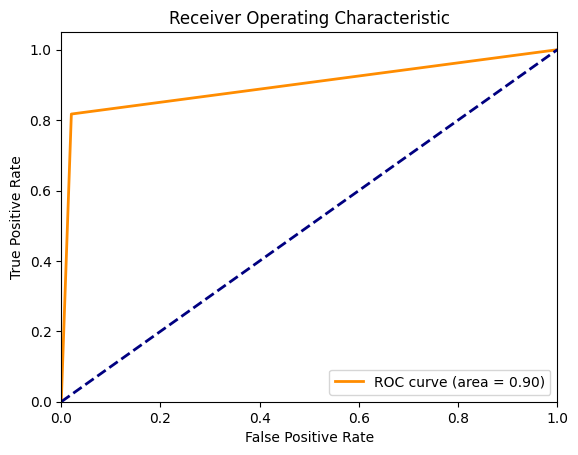

Model: Decision Trees
Precision: 0.8207, Recall: 0.8173, F1-Score: 0.8179
Confusion Matrix:
[[5199  341   75   44    7    8   14   53  187   72]
 [1188 4491   20   36   12   25   19   43   57  109]
 [ 109   87 5366  115   11  112   41   79   66   14]
 [ 181  100   38 4824  158  168  127  360   16   28]
 [  25   42    6  199 4957  461   72   99   28  111]
 [  46  107  237  233  282 4758  111   52  126   48]
 [  38   38   40  102   31   55 4778  838    7   73]
 [  55   21   18  492  104   43  520 4680    9   58]
 [ 175  116   35   20   51  138   38   78 5125  224]
 [ 176  250   24   38  116  115   83  150  190 4858]]
ROC-AUC Score: 0.8985



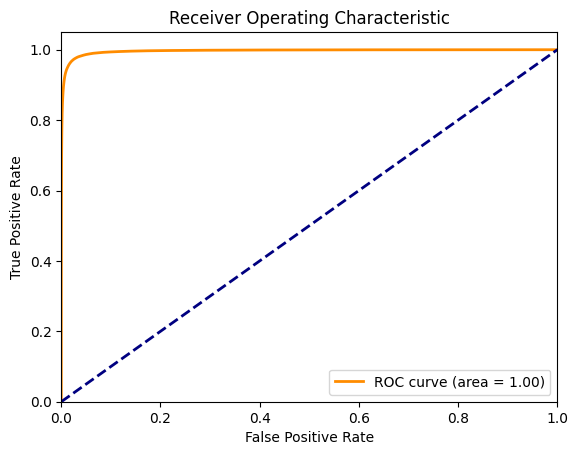

Model: Random Forest
Precision: 0.9356, Recall: 0.9345, F1-Score: 0.9347
Confusion Matrix:
[[5733  183    1   19    1    0    1    8   43   11]
 [ 242 5683    0   13    1    1    1    0   19   40]
 [ 139   14 5781   46    4    8    0    2    6    0]
 [  90   18    7 5764   19   46   13   38    4    1]
 [   5    3    1   42 5708  149   11   44   17   20]
 [   3   41   59  118   59 5665   31    4   18    2]
 [  12    7    5   61    9    6 5260  630    0   10]
 [  53   17    9  301   19   19  390 5185    4    3]
 [ 115   19    4   42   18   17   20    0 5734   31]
 [  87   11    1   32   98   16   37  121   40 5557]]
ROC-AUC Score: 0.9963



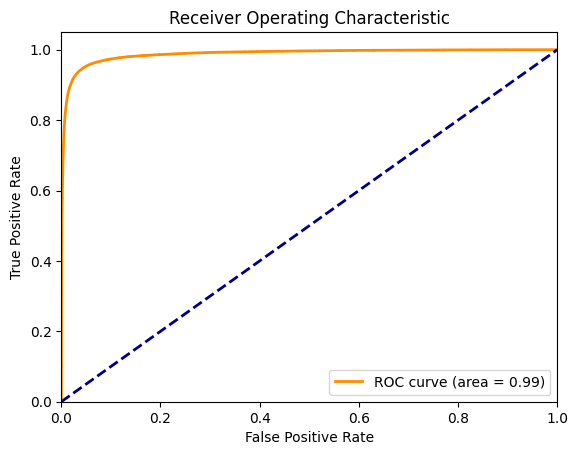

Model: Naive Bayes
Precision: 0.8799, Recall: 0.8751, F1-Score: 0.8761
Confusion Matrix:
[[5460  305    0   11    1    0    1   24  190    8]
 [ 541 5292    0   24    4    1    0    7   62   69]
 [ 407   20 5475   19    1   34    7   11   25    1]
 [ 222   25    8 5427   51   60   43  157    7    0]
 [  23    3    1   32 5509  217    7  129   53   26]
 [   4   45   82  116   90 5545   34    8   74    2]
 [  49    7    3   56   13    3 4736 1130    2    1]
 [ 227   21    0  466   32   24 1028 4185   13    4]
 [ 239   29    0   43   36   10   11   14 5557   61]
 [ 267   12    0    5   94   17   14  194   79 5318]]
ROC-AUC Score: 0.9875



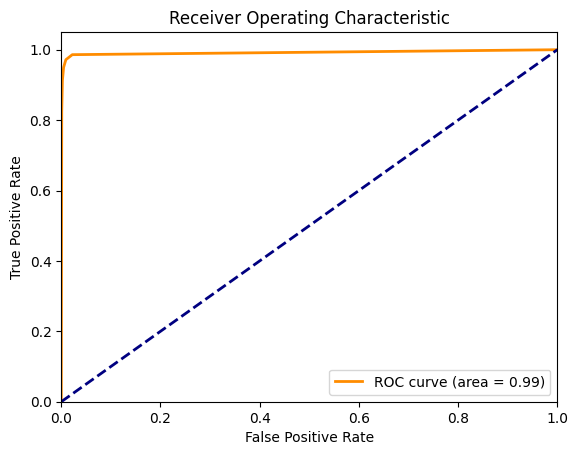

Model: K-NN Classifier
Precision: 0.9533, Recall: 0.9524, F1-Score: 0.9526
Confusion Matrix:
[[5774  184    0    9    0    1    0    9   17    6]
 [ 300 5669    0    4    2    0    0    0    2   23]
 [  62    7 5886   31    5    3    2    2    0    2]
 [  97    5    5 5812   19   19    0   39    4    0]
 [   6    6    0   28 5822   77    9   43    1    8]
 [   1    6   10   99   64 5805   10    2    1    2]
 [   1    0    0   20   17    0 5547  396    0   19]
 [   7    9    1  248   13    2  327 5384    1    8]
 [ 149    8    1   29   20   27    3    2 5746   15]
 [  18    1    1    8   66    6   61  134    7 5698]]
ROC-AUC Score: 0.9917



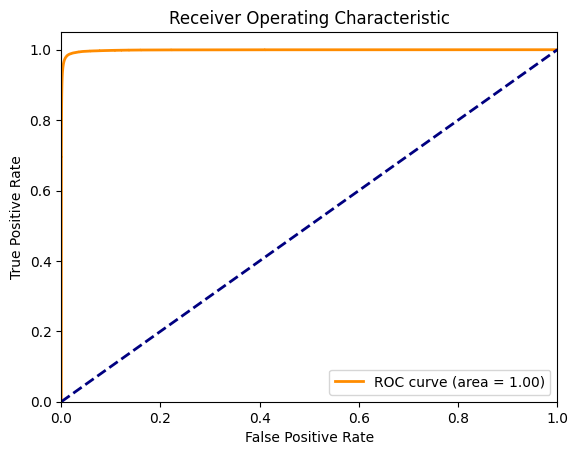

Model: SVM
Precision: 0.9624, Recall: 0.9619, F1-Score: 0.9620
Confusion Matrix:
[[5859  100    0    9    0    1    2    6   20    3]
 [ 158 5812    0    7    0    0    2    0    3   18]
 [  47    3 5919   26    0    1    0    3    0    1]
 [  44    2    4 5856   14   37    3   37    3    0]
 [   3    1    0   41 5732  164    3   36    5   15]
 [   0   15    8   66   23 5875    4    4    4    1]
 [   1    1    2   27    4    0 5603  353    0    9]
 [   7    6    0  203    5    3  254 5510    0   12]
 [  78    7    3   22   13   11    3    3 5843   17]
 [  13    1    1   13   84   14   76   88    4 5706]]
ROC-AUC Score: 0.9987



In [3]:
#Project 1 --> Kannada MNIST - Classification Problem

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import os


# List files in directory
directory = 'C:/Users/Sujay/OneDrive/Kannada MNIST'
files = os.listdir(directory)
print("Files in directory:")
print(files)

datasets = []

# Load all .npz files in the directory
for file_name in files:
    if file_name.endswith('.npz'):
        file_path = os.path.join(directory, file_name)
        data = np.load(file_path)
        datasets.append(data['arr_0'])

# split into training and testing sets
X_train, X_test, y_train, y_test = datasets

# Print shapes of the loaded data
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Reshape the data into 2D arrays
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("Shape of X_train_flat:", X_train_flat.shape)
print("Shape of X_test_flat:", X_test_flat.shape)

# Step 2: Perform PCA for different component sizes
component_sizes = [15,20,25,30]
for size in component_sizes:
    pca = PCA(n_components=size)
    X_train_pca = pca.fit_transform(X_train_flat)
    X_test_pca = pca.transform(X_test_flat)
    
    # Step 3: Apply the models
    models = {
        'Decision Trees': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB(),
        'K-NN Classifier': KNeighborsClassifier(),
        'SVM': SVC(probability=True)
    }

    # Step 4: Evaluate each model and produce metrics
    for name, model in models.items():
        # Train the model
        model.fit(X_train_pca, y_train)
        
        # predictions
        y_pred = model.predict(X_test_pca)
        
        # Compute metrics
        precision, recall, f1, _ = classification_report(y_test, y_pred, output_dict=True)['weighted avg'].values()
        cm = confusion_matrix(y_test, y_pred)
        roc_auc = roc_auc_score(pd.get_dummies(y_test), model.predict_proba(X_test_pca), average='weighted', multi_class='ovr')
        fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), model.predict_proba(X_test_pca).ravel())

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
        # Print metrics
        print(f"Model: {name}")
        print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")
        print("Confusion Matrix:")
        print(cm)
        print(f"ROC-AUC Score: {roc_auc:.4f}\n")
